# Kernel principal component analysis 

Once we escape the mathematically convinient world of linear dimensionality reduction models, it becomes difficult to talk in the same generality about the properties of "nonlinear" models. Many would say that making general conclusions about nonlinear methods is like talking about all animals that are not elephants. That is, there are many types of modelling assumptions we can make in order to try to infer some latent structure in our data and in the next sections we will focus on few diffirent dimensionality reduction and manifold learning approaches. In this section section we will make a leap to kernel methods which will help us also understand better dimensionality reduction models based on $\textit{Gaussian processes}$ (which are to follow). First, we will study simple extensions of PCA algorithm which can be obtained using the "kernel trick".  

In the last chapter we studied linear dimensionality reduction methods (such as the conventional principal component analysis) which rely on the assumption that high dimensional data in $R^D$ can be represented efficiently as a linear combination of some lower dimensional variables in $R^M$. However, although such methods often work well in practice, it is not something we can assume in general. 
Let us consider we are interested at clustering some high dimensional input data. In general $D$ points often cannot be linearly separated in $D<N$ dimensions, they can almost always be separated in $D\geq N$ dimensions. Given $N$ points,$\mathbf{y}_i$, if we map them to an $N$-dimensional space using the function:
\begin{equation}
\phi\left(\mathbf{y}_i\right) \text{ where } \phi : R^D\to R^N
\end{equation}
in the $N$-dimensional space it becomes easy to construct a hyperplane that divides the points into arbitrary clusters. In kernel PCA, we choose an arbitrary function $\phi$ to apply a "convinient" transformation to the data space; since we will not be calculating the $\phi$-space explicitly we can select a very high-dimensional $\phi$'s. If we assume that the $\phi$-space (also called feature space) could be intractable, we construct $N$-by-$N$ kernel:
\begin{equation}
K = \kappa(\textbf{y}_i,\textbf{y}_j) = \left(\phi(\textbf{y}_i), \phi(\textbf{y}_j)\right) = \phi(\textbf{y}_i)^T\phi(\textbf{y}_j)
\end{equation}
which represents the inner product space of the feature space. If the projected dataset $\phi(\textbf{x}_i)$ does not have zero mean, we can use the $\textit{Gram matrix}$ $\tilde{K}$ to substitute the kernel matrix $K$. The Gram matrix is given by:
\begin{equation}
\tilde{K} = K - \textbf{1}_NK - K\textbf{1}_N + \textbf{1}_N K\textbf{1}_N
\end{equation} 
where $\textbf{1}_N$ is the $N × N$ matrix with all elements equal to $1/N$ (Bishop, 2006).

The standard steps of kernel PCA dimensionality reduction can then be summarized as:

(1) Construct a kernel matrix $K$ from the training data set $y$.

(2) Compute the Gram matrix $\tilde{K}$.

(3) Find the $N$-dimensional column vectors $\textbf{a}_k = \left[a_{k1}, \dots , a_{kN}\right]$ by solving the eigenvector equation $K\textbf{a}_k = \lambda_k N \textbf{a}_k$; substitute $K$ with $\tilde{K}$ to ensure centering in the feature space.

(4) Compute the kernel principal components $\textbf{x}_k = \phi(\textbf{y})^T v_k = \sum_{i=1}^N a_{ki} \kappa\left(\textbf{y},\textbf{y}_i\right)$ where $\kappa\left(\textbf{y},\textbf{y}_i\right)$ denotes $i$-th column of the kernel matrix. 

As mentioned above, the power of kernel methods and specifically kernel PCA is that we do not have to compute $\phi\left(\textbf{y}_i\right)$ explicitly. We can directly construct the kernel matrix from the data set efficiently (Weinberger et al., 2004) and perform the rest of the updates using its values. 

Commonly used kernels are: 
the polynomial kernel:
\begin{equation}
\kappa\left(\textbf{y}_i,\textbf{y}_j \right) = \left(\textbf{y}_{i}^{T} \textbf{y}_j + c\right)^{d}
\end{equation}
with $c \geq 0$ and $d$ being kernel parameters;
the Gaussian kernel (also referred to as the $\textit{radial basis function kernel}$):
\begin{equation}
\kappa\left(\textbf{y}_i,\textbf{y}_j \right) = \exp \left( -\lVert \textbf{y}_i - \textbf{y}_j \rVert ^2 / {2\sigma^2}\right)
\end{equation}
with parameter $\sigma$.

$\textbf{Reconstructing the data}$: While we saw above how we can effectively estimate projections of the data in lower dimensional space (even if we pass through high dimensional manifold first), in many scenarios it is useful to reconstruct the inverse-transform (pre-images) $\textbf \hat{y}$ given the kernel PCA features $\textbf{x}$. This reconstruction can have many uses including as an evidence of how appropriate your choice of kernel as been. In standard PCA algorithm, the original space can be reconstructed with $\hat{\textbf{y}_i} = \sum_{k=1}^{M}\left(\textbf{y}_{i}^T \textbf{w}_k\right)\textbf{w}_k$. However, this expression cannot be used for kernel PCA and we define a projection operator $P_m$ which projects $\phi(\textbf(y))$ to its approximation $P_m \phi(\textbf(y)_i) = \sum_{k=1}^m \textbf{x}_k \textbf{v}_k$. Since finding the exact inverse-transform is difficult we often find an approximation $\textbf{y*}$ such that $\phi(\textbf{y*}_i) \approx P_m \phi(\textbf{y}_i)$. This can be approximated by minimizing the square loss.  

For some specific kernels, there are existing techniques to compute the approximated inverse-transforms $\textbf{y*}$. 

$\textbf{Question:}$ Can you formulate mathematically an iterative procedure for estimating $\textbf{y*}$ for the Gaussian kernel?

# Relation to PCA algorithm 

Kernel PCA algorithm is essentially using a kernel trick with standard PCA. The resulting algorithm is very similar to the conventional PCA algorithm we saw in the last section, expect that every dot product is replaced by a nonlinear kernel function. The algorithm collects the top $k$ eigenvectors of the centered kernel matrix (instead of the sample covariance as in PCA) based on their corresponding eigenvalues, which are ranked by decreasing magnitude. But unlike standard PCA, the eigenvectors of kernel PCA are not the principal component axes but the samples projected onto those axes.


# Implementation

Following the outline of the procedure above, I invite you to try and extend your PCA code from the previous section to obtain the kernel PCA. However, it is also sufficient to learn and understand how to use the scikit-learn implementation (if you are Python users) key input arguments for which are the data, the kernel type as well as the relevant kernel parameters. Let us now look at a very simple application which might help us understand better the type of problems for which the kernel PCA method can be more suited than the standard PCA algorithm. 

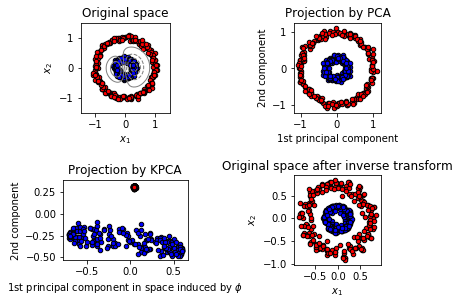

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.2, 0.10, 0.98, 0.94, 0.7, 0.7)

plt.show()

Due to the specific geometry of the input data, we can see data is better expressed with the Gaussian kernel, compared to the default linear kernel employed by the standard PCA algorithm. However, this is does not necessarily mean that the kernel PCA would give us an intuitive visualization of the data. In fact, the advantages of kernel PCA are more towards making the data more separable in the reduced (projected) space.   

$\textbf{Question:}$ Take the example above and now project the synthetic data down to 1-d using both PCA and kernel PCA algorithms?